In [16]:
import pandas as pd
import os

interactome_signatures_path = "../../interactome-signatures/results/topwiz_maxpxf100_minp4_maxp40"

my_fids = set(pd.read_csv("../data/finalScreen.tsv", sep="\t")["fragId"].tolist())

df = pd.read_csv(os.path.join(interactome_signatures_path, "FragmentHasTopic.csv"))
df = df[df["fid"].isin(my_fids)]
renamer = dict(("Topic {0}".format(i), "sign_{0}".format(i)) for i in range(10))
df = df.rename(columns=renamer)

df.to_csv("../assets/fragment-has-signature.csv", index=False)

In [21]:
df = pd.read_csv(os.path.join(interactome_signatures_path, "ProteinHasTopic.csv"))
df = df.rename(columns = renamer)

df.to_csv("../assets/protein-has-signature.csv", index=False)

In [28]:
df = pd.read_csv(os.path.join(interactome_signatures_path, "enrichr_summary_results.csv"))
df = df.rename(columns={"topic": "signature"})

go_cat = []
for l in df["go_cat"].tolist():
    if l.endswith("0"):
        go_cat += ["CC"]
    else:
        go_cat += ["MF"]
df["go_cat"] = go_cat

df.to_csv("../assets/signature-has-enrichment-term-summary.csv", index=False)

In [30]:
from stylia.colors import ContinuousColorMap

cmap = ContinuousColorMap()
cmap.fit([i for i in range(10)])
topic_colors = cmap.transform([i for i in range(10)])

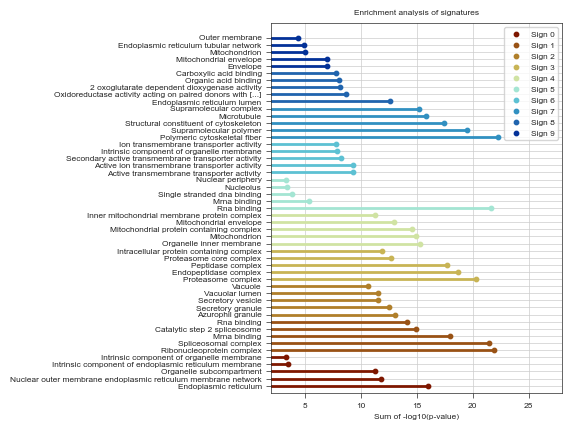

In [64]:
import stylia
import matplotlib.pyplot as plt
from stylia import TWO_COLUMNS_WIDTH
import textwrap

fig, axs = stylia.create_figure(1,1, width=TWO_COLUMNS_WIDTH*0.8, height=TWO_COLUMNS_WIDTH*0.6)
ax = axs.next()

label_idxs = [i*5 for i in range(10)]
ylabels = []
for i, r in enumerate(df.values):
    color = topic_colors[r[0]]
    v = r[-1]
    if i in label_idxs:
        l = "Sign {0}".format(r[0])
    else:
        l = None
    ylabels += [textwrap.shorten(r[2], width=70)]
    ax.scatter(x=[v], y=[i], color=color, label=l)
    ax.plot([0, v], [i, i], color=color, lw=2)
ax.set_yticks([i for i in range(df.shape[0])])
ax.set_yticklabels(ylabels)
ax.set_ylim(-1, 51)
ax.legend(loc="upper right")
ax.set_xlim(2, 28)

plt.tight_layout()

stylia.label(ax=ax, title="Enrichment analysis of signatures", xlabel="Sum of -log10(p-value)", ylabel="")

stylia.save_figure("../assets/signature-has-enrichment-term-summary.png")
stylia.save_figure("../assets/signature-has-enrichment-term-summary.pdf")
